# Running a Monte-**Carlo** simulation on BTC-USD from 1 Jan 2023
---

### Installing dependencies
---

In [56]:
!pip install yfinance

### Importing libraries
---

In [57]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib

### Getting asset data from Yahoo finance
---

In [58]:
start = dt.datetime(2023,1,1)
end = dt.datetime.now()
lookback = dt.timedelta(days=1000)
asset = 'BTC-USD'
num_simulations = 1000
num_days = 30

In [59]:
stock = yf.download(asset, start = end-lookback, end = end)['Close']
returns = stock.pct_change()
log_ret = pd.DataFrame( [np.log(1+x)for x in returns.values])
mu , sigma = returns.mean(), returns.std()
avg = stock.mean()
vol = stock.std()
print(avg, vol)

[*********************100%%**********************]  1 of 1 completed

36658.440224609374 15885.548835510504


### Calculating prices for N simulations
---

<ipython-input-60-03f1cd44879a>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  res[x] = sim_prices #running the simulation num_simulation times


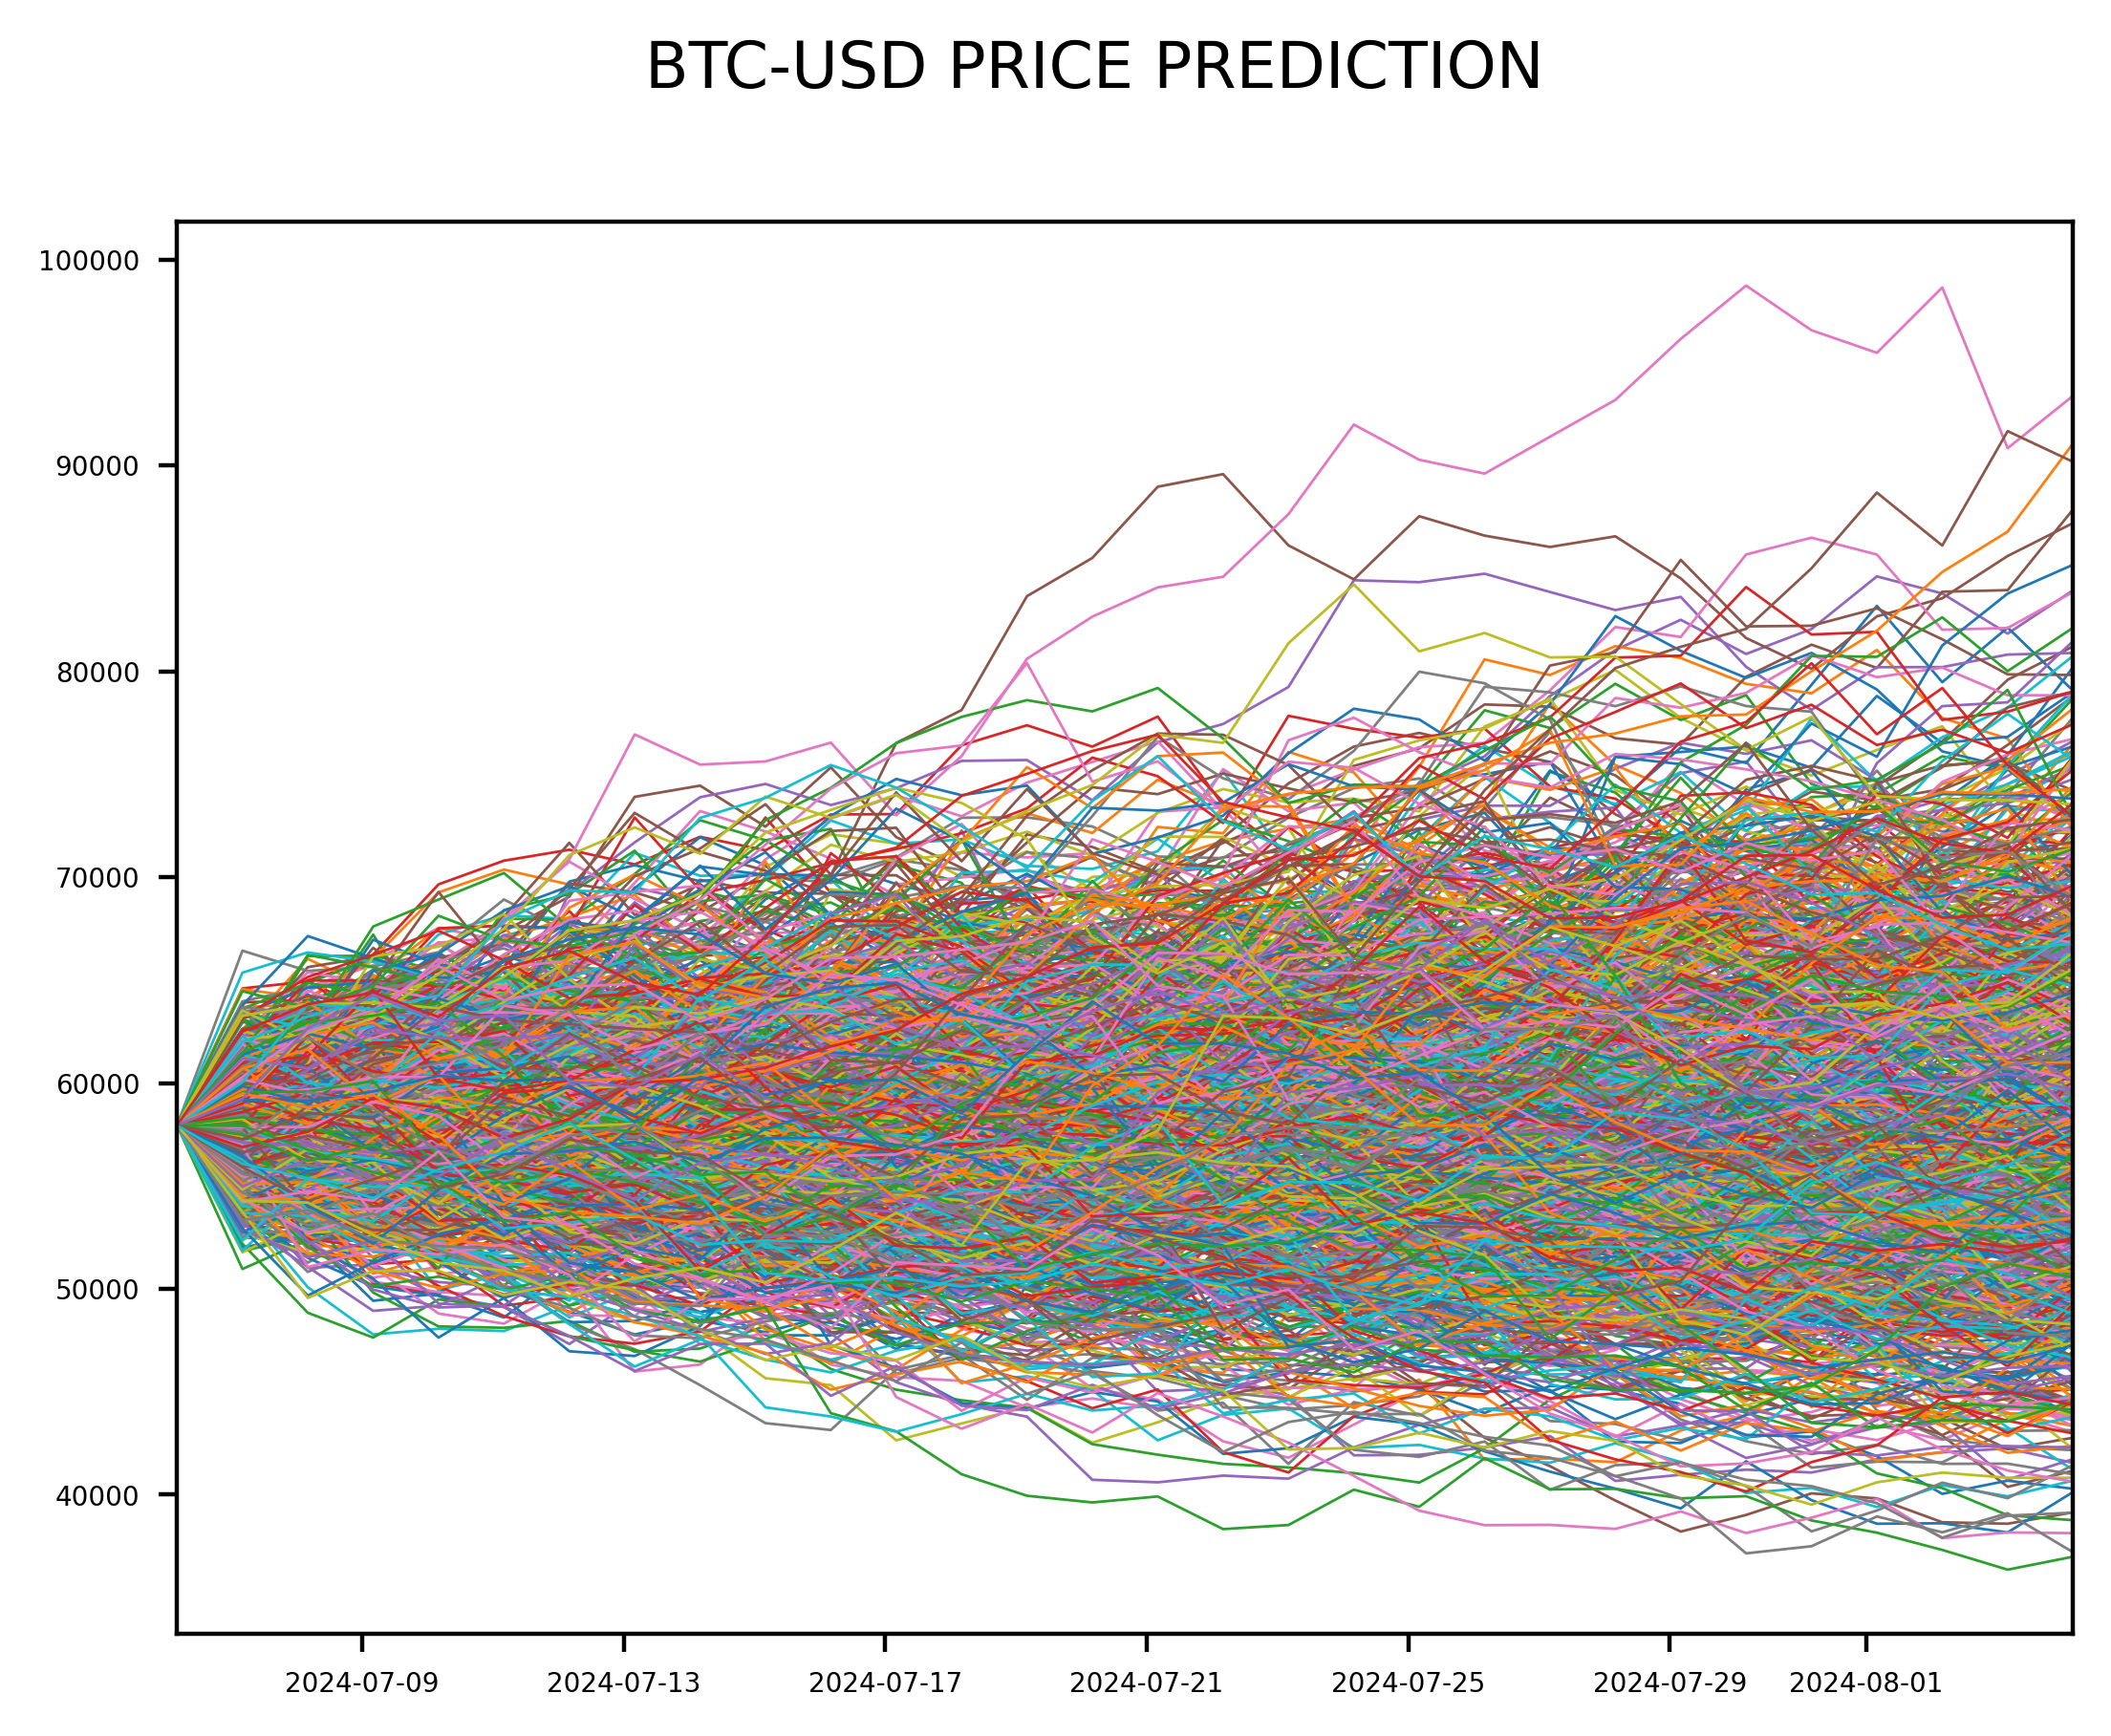

In [60]:
res = pd.DataFrame()
last_price = stock[-1]
plt.figure(dpi = 400,)
for x in range(num_simulations):

  sim_ret = np.random.normal(mu,sigma,num_days) #normal distribution of percentage returns
  sim_prices = last_price*(1+sim_ret).cumprod() #calculating price of asset for each day in num_days

  res[x] = sim_prices #running the simulation num_simulation times

res.iloc[0] =pd.array([last_price]*num_simulations)

date = pd.date_range(start = end-dt.timedelta(days=1), periods=num_days,freq='D')
res.set_index(date,inplace=True)
matplotlib.rc('xtick', labelsize=5)
matplotlib.rc('ytick', labelsize=5)

plt.xlim(res.index[0],res.index[-1])
plt.suptitle(f"{asset} PRICE PREDICTION")
plt.plot(res,linewidth = 0.5);

### Animation
---

In [61]:
'''from matplotlib import rc
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
fig = plt.figure(dpi = 150)

ax = plt.subplot(1,1,1)
plt.suptitle(f"{asset} PRICE {num_days}-DAY PREDICTION")
def update_plot(i):
  plt.xlim(res.index[0],res.index[-1])
  return ax.plot(res.index, res[i],color = 'dimgray', linewidth = 0.5)
anim = FuncAnimation(fig,update_plot, frames=num_simulations,interval = 10,blit=True)
HTML(anim.to_html5_video())'''

'from matplotlib import rc\nfrom IPython.display import HTML\nfrom matplotlib.animation import FuncAnimation\nfig = plt.figure(dpi = 150)\n\nax = plt.subplot(1,1,1)\nplt.suptitle(f"{asset} PRICE {num_days}-DAY PREDICTION")\ndef update_plot(i):\n  plt.xlim(res.index[0],res.index[-1])\n  return ax.plot(res.index, res[i],color = \'dimgray\', linewidth = 0.5)\nanim = FuncAnimation(fig,update_plot, frames=num_simulations,interval = 10,blit=True)\nHTML(anim.to_html5_video())'

# Calculating 95% prediction interval for the last day
---

Text(0.89, 0.84, 'Expected price on the last day is 58686\n95% Prediction interval: (40641, 76731)')

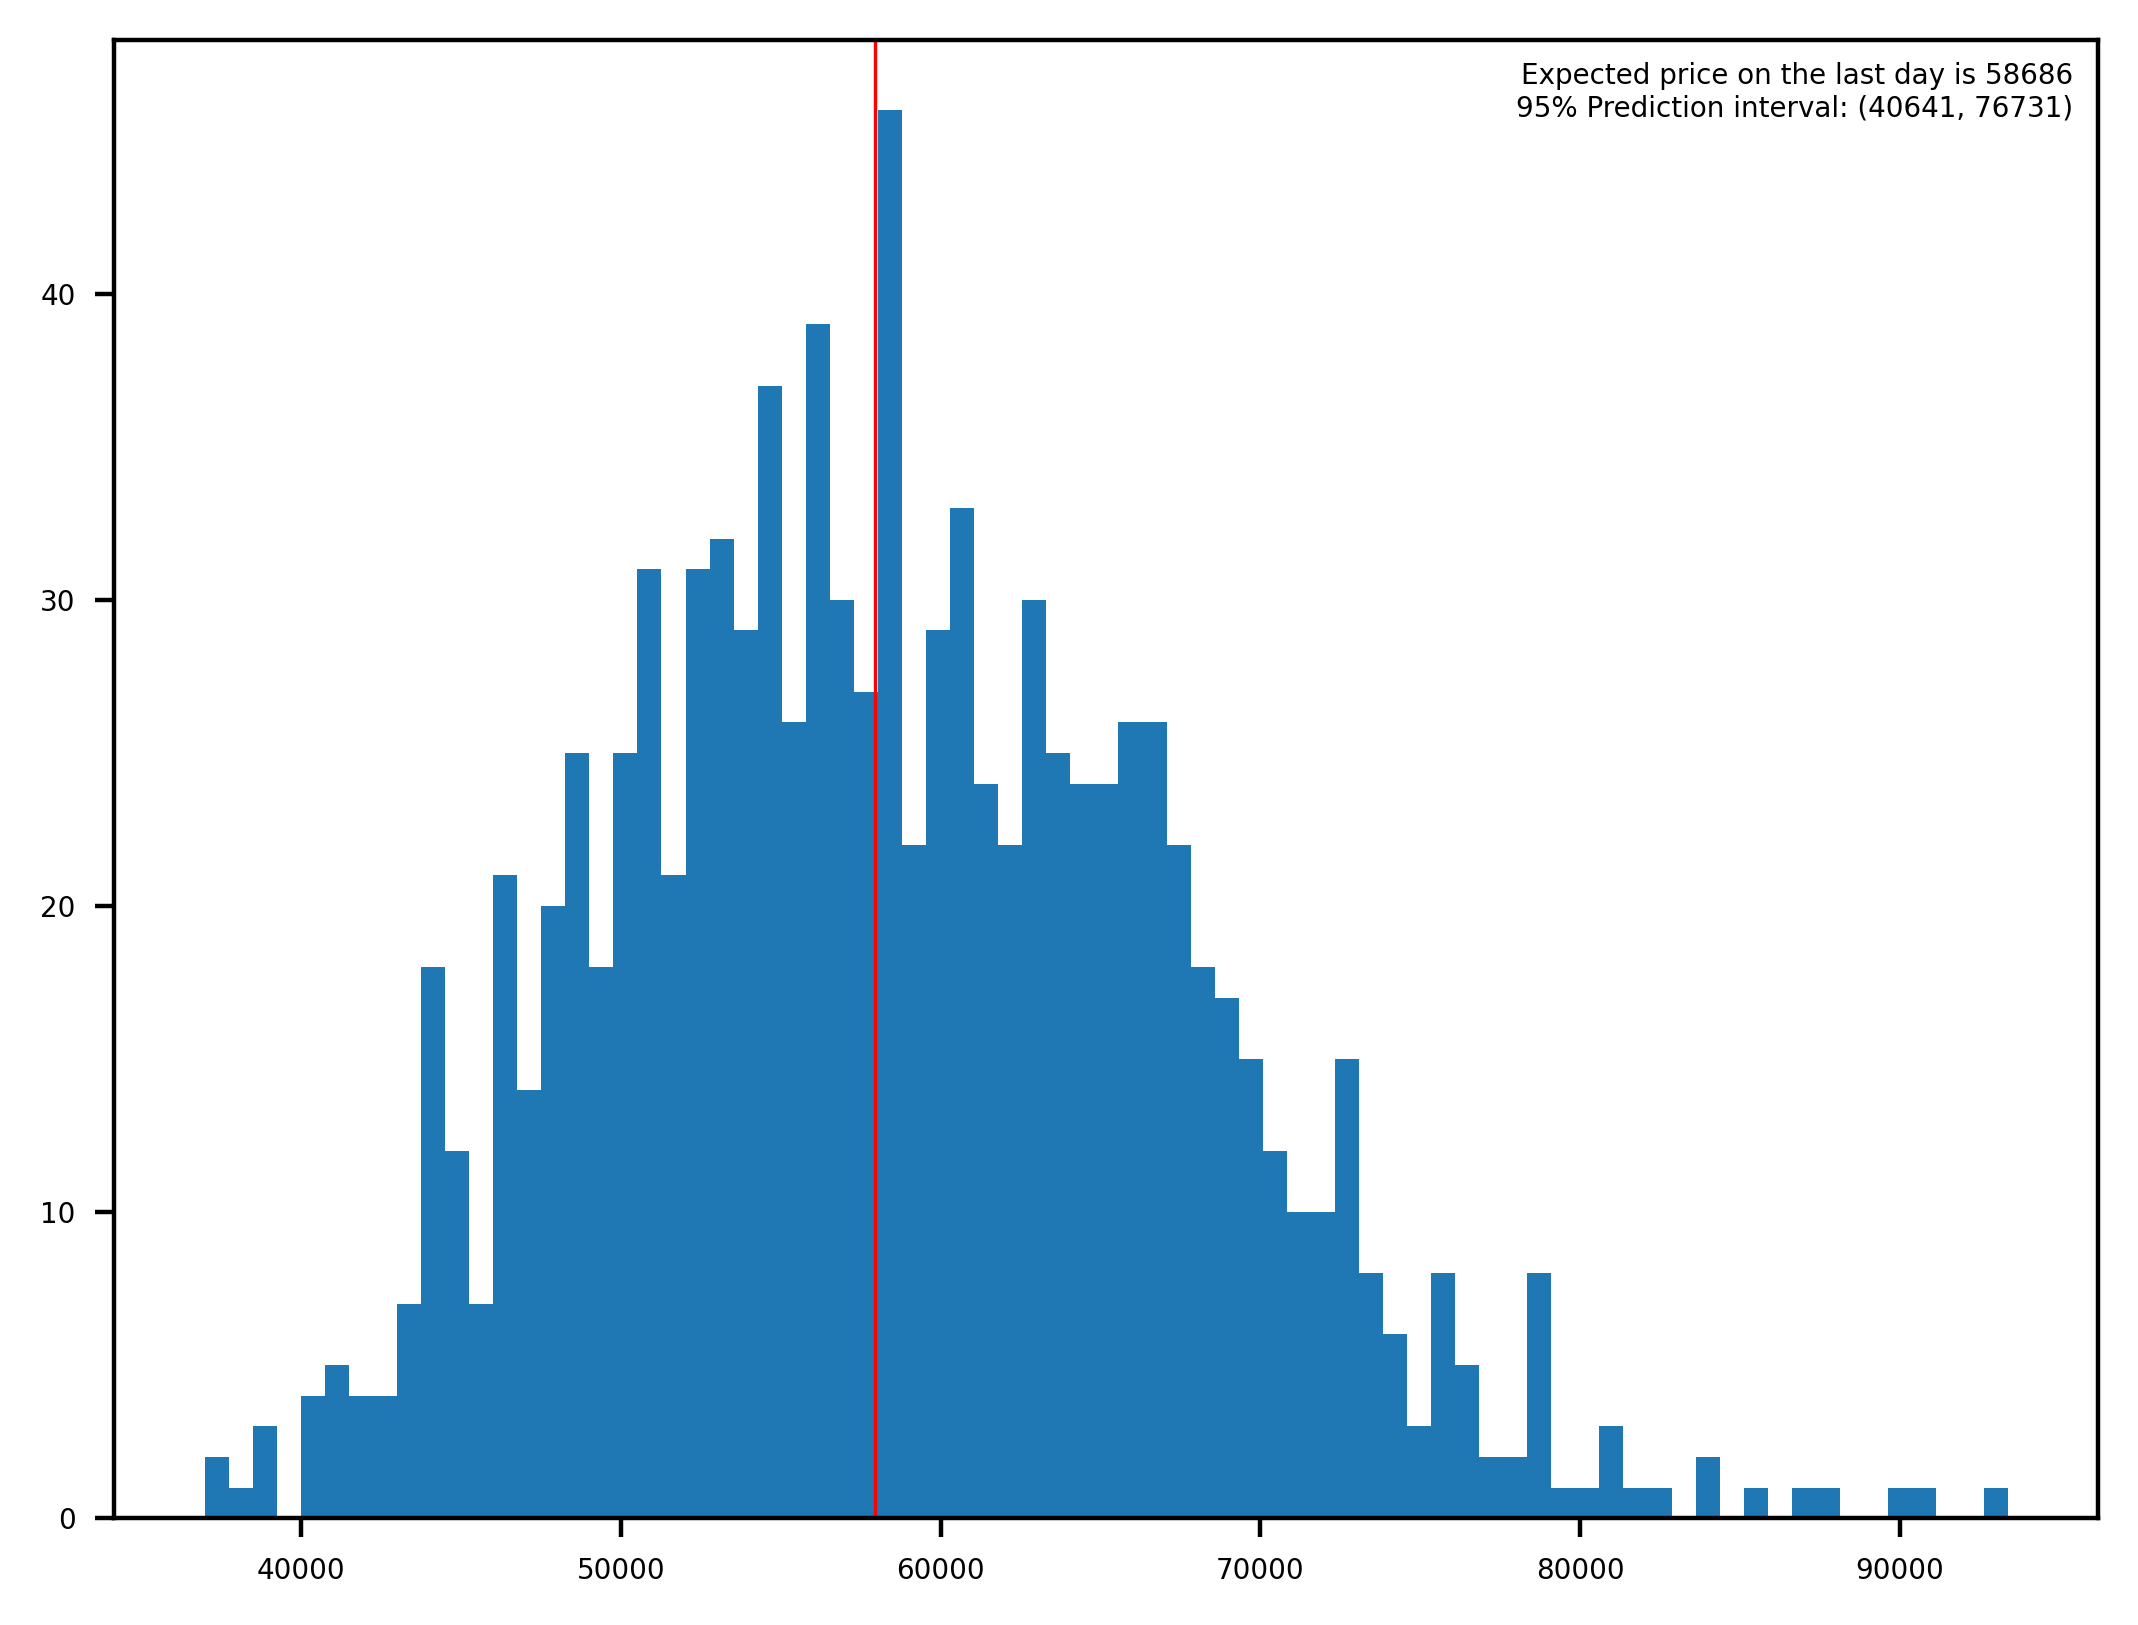

In [62]:
last_day = res.iloc[-1]
plt.figure(dpi=400)
plt.hist(last_day,bins=75)
plt.axvline(stock[-1], color='red', linestyle = '-', linewidth= '0.6')
string = f"Expected price on the last day is {round(last_day.mean())}\n95% Prediction interval: {round(last_day.mean() -2*last_day.std()), round(last_day.mean() +2*last_day.std())}"
plt.figtext(x=0.89, y=0.84,s=string, fontsize=5, ha='right')


50